 # Распределения, связанные с нормальным

In [2]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm

## 1)Распределение Хи-Квадрат

### Информация https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

## Пусть случайная величина X имеет распределение хи-квадрат с 5-ю степенями свободы, то есть X~chi2(5)

In [3]:
k = 5                                                # число степеней свободы (degrees of freedom)
chi2.cdf(0.7, df = k)                                # F(0.7) = P(X <= 0.7)    - функция распределения в точке 0.7
chi2.pdf(0.7, df = k)                                # f(0.7) = F'(0.7)        - функция плотности в точке 0.7
chi2.mean(df = k)                                    # E(X)                    - математическое ожидание X
chi2.var(df = k)                                     # Var(X)                  - дисперсия X
chi2.median(df = k)                                  # Median(X)               - медиана X 
chi2.ppf(q = 0.95, df = k)                            # q: P(X < q) = 0.6       - квантиль уровня 0.6 с.в. X
#chi2.rvs(size = 1000, df = 5)                         #                         - выборка объема 1000 из X
print(chi2.mean(df = k),chi2.var(df = k))
print(chi2.median(df = k) ,chi2.ppf(q = 0.95, df = k))

5.0 10.0
4.351460191095528 11.070497693516351


## График функции плотности и  функции распределения

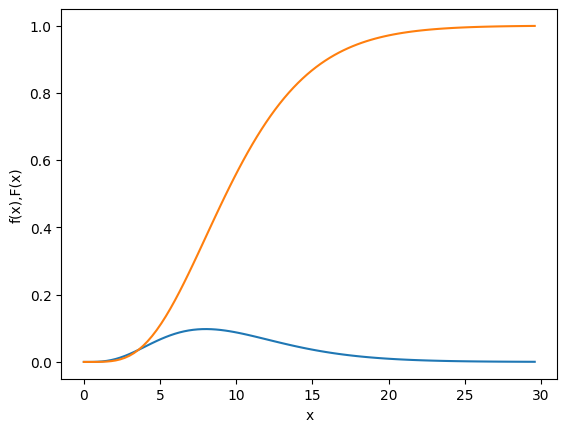

9.34181776559197

In [4]:
k=10
x = np.linspace(0, chi2.ppf(q = 0.999, df = k), 100)
#x= np.arange(0, chi2.ppf(q = 0.99, df = k), 1.0)
f_x = chi2.pdf(x, df = k)                            # значение функции плотности в соответствующих точках
F_x = chi2.cdf(x, df = k)                            # значение функции распределения в соответствующих точках
plt.xlabel('x')                                       # название нижней оси графика
plt.ylabel('f(x),F(x)')                                 # название верхней оси графика
plt.plot(x,f_x)                                         # график функции плотности 
plt.plot(x,F_x)                                          # график функции распределения           
plt.show()
chi2.ppf(q = 0.5, df = k)


## 2) Распределение Стьюдента

### Информация: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [5]:
k = 5                                                # число степеней свободы
t.cdf(0.7, df = k)                                   # F(0.7) = P(X <= 0.7)    - функция распределения в точке 0.7
t.pdf(0.7, df = k)                                   # f(0.7) = F'(0.7)        - функция плотности в точке 0.7
t.mean(df = k)                                       # E(X)                    - математическое ожидание X
t.var(df = k)                                        # Var(X)                  - дисперсия X
t.median(df = k)                                     # Median(X)               - медиана X
t.moment(order = 5, df = k)                              # E(X ^ 5)                - пятый (не центральный) момент X
t.ppf(q = 0.6, df = k)                               # q: P(X < q) = 0.6       - квантиль уровня 0.6 с.в. X
#t.rvs(size = 1000, df = 5)                            #                         - выборка объема 1000 из X


0.2671808657039658

## По мере увеличения числа степеней свободы распредедление Стьюдента стремится к стандартному нормальному

In [6]:
alpha = 2                                           # рассмотрим произвольную точку
# убедимся, что функции распределения обоих распредедений в этой точке очень близки                            
print(t.cdf(alpha, df = 10000) ,norm.cdf(alpha) )

0.9772363696692823 0.9772498680518208


##  График функции плотности и  функции распределения

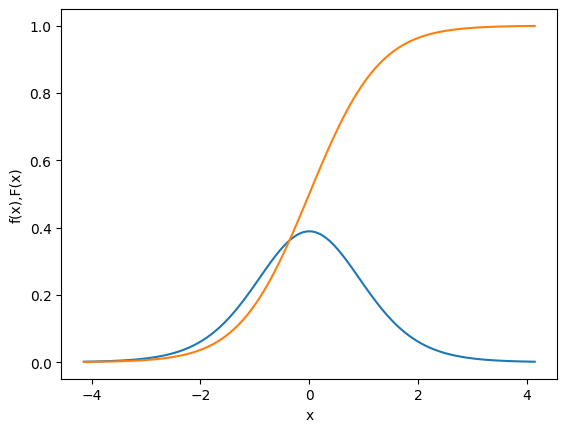

In [7]:
k=10
x = np.linspace(t.ppf(q = 0.001, df = k),            # точки, между которыми будет
                t.ppf(q = 0.999, df = k),            # строиться график
                100)                                 # количество точек (чем больше, тем больше детализация)
f_x = t.pdf(x, df = k)                               # значение функции плотности в соответствующих точках
F_x = t.cdf(x, df = k)                               # значение функции распределения в соответствующих точках
plt.xlabel('x')                                       # название нижней оси графика
plt.ylabel('f(x),F(x)')                                    # название верхней оси графика
plt.plot(x,f_x)                                         # график функции плотности 
plt.plot(x,F_x)                                          # график функции распределения           
plt.show()


## 3) Распределение Фишера

## Информация: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html¶

In [8]:
k1 = 5                                               # число степеней свободы
k2 = 10
f.cdf(0.7, dfn = k1, dfd = k2)                      # F(0.7) = P(X <= 0.7)    - функция распределения в точке 0.7
f.pdf(0.7, dfn = k1, dfd = k2)                      # f(0.7) = F'(0.7)        - функция плотности в точке 0.7
f.mean(dfn = k1, dfd = k2)                          # E(X)                    - математическое ожидание X
f.var(dfn = k1, dfd = k2)                           # Var(X)                  - дисперсия X
f.median(dfn = k1, dfd = k2)                        # Median(X)               - медиана X
f.moment(order = 3, dfn = k1, dfd = k2)                 # E(X ^ 3)                - третий (не центральный) момент X
f.ppf(q = 0.6, dfn = k1, dfd = k2)                  # q: P(X < q) = 0.6       - квантиль уровня 0.6 с.в. X
#f.rvs(size = 1000, dfn = k1, dfd = k2)              #                         - выборка объема 1000 из X

# Рассмотрим квантиль соответствующего уровня
alpha = 0.7
# Произведение соответствующих квантилей всегда
# будет равняться единице (догадайтесь почему)
f.ppf(q= 1 - alpha, dfn = k1, dfd = k2) * f.ppf(q = alpha, dfn = k2, dfd = k1)


0.9999999999999999

## График функции плотности и функции распределения

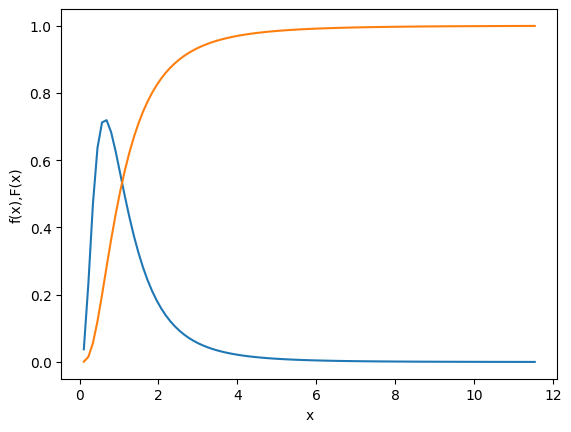

In [9]:
k1=10
k2=8
x = np.linspace(f.ppf(q = 0.001,
                      dfn = k1, dfd = k2),          # точки, между которыми будет
                f.ppf(q = 0.999,                      # строиться график
                      dfn = k1, dfd = k2),
                100)                                 # количество точек (чем больше, тем больше детализация)
f_x = f.pdf(x, dfn = k1, dfd = k2)                  # значение функции плотности в соответствующих точках
F_x = f.cdf(x, dfn = k1, dfd = k2)                  # значение функции распределения в соответствующих точках
plt.xlabel('x')                                       # название нижней оси графика
plt.ylabel('f(x),F(x)')                                    # название верхней оси графика
plt.plot(x,f_x)                                         # график функции плотности 
plt.plot(x,F_x)                                          # график функции распределения           
plt.show()

In [10]:
# Задания
# 1. Случайная величина X имеет Хи-квадрат распредедение
#    с 10-ю степенями свободы
#    Рассчитайте:
#    1)     P(X <= 1.5)
#    2)     P(X > 1.5)
#    3)     P(1.5 <= X <= 2)
#    4)     E(X), Var(X), Median(X)
#    7)     Квантиль уровня 0.1
#    
# 2. Повторите предыдущее задание предполагая, что:
#    1)     X имеет распределение Стьюдента с 10
#           степенями свободы
#    2)     X имеет распределение Фишера с 10 и 8
#           степенями свободы

In [11]:
# 1 Хи-2, 10
k = 10
q = chi2.cdf(1.5, df=k)
print(f"1) {q = };\n2) {1 - q = }")
print(f"3) {chi2.cdf(2, df=k) - q = }")
print(f"4) {chi2.mean(df=k) = },\n   {chi2.var(df=k) = },\n   {chi2.median(df=k) = }")
print(f"5) {chi2.ppf(0.1, df=k) = }")


1) q = 0.0010646777727857926;
2) 1 - q = 0.9989353222272143
3) chi2.cdf(2, df=k) - q = 0.0025951690545579203
4) chi2.mean(df=k) = 10.0,
   chi2.var(df=k) = 20.0,
   chi2.median(df=k) = 9.34181776559197
5) chi2.ppf(0.1, df=k) = 4.865182051925328


In [12]:
# 2 Стьюдент, 10
k = 10
q = t.cdf(1.5, df=k)
print(f"1) {q = };\n2) {1 - q = }")
print(f"3) {t.cdf(2, df=k) - q = }")
print(f"4) {t.mean(df=k) = },\n   {t.var(df=k) = },\n   {t.median(df=k) = }")
print(f"5) {t.ppf(0.1, df=k) = }")


1) q = 0.9177463367772799;
2) 1 - q = 0.0822536632227201
3) t.cdf(2, df=k) - q = 0.04555964583734984
4) t.mean(df=k) = 0.0,
   t.var(df=k) = 1.25,
   t.median(df=k) = 6.80574793290978e-17
5) t.ppf(0.1, df=k) = -1.3721836411102861


In [13]:
# 3 Фишер, 10, 8
k1 = 10
k2 = 8
q = f.cdf(1.5, dfn=k1, dfd = k2)
print(f"1) {q = };\n2) {1 - q = }")
print(f"3) {f.cdf(2, dfn=k1, dfd = k2) - q = }")
print(f"4) {f.mean(dfn=k1, dfd = k2) = },\n   {f.var( dfn=k1, dfd = k2) = },\n   {f.median( dfn=k1, dfd = k2) = }")
print(f"5) {f.ppf(0.1, dfn=k1, dfd = k2) = }")


1) q = 0.7110457163218693;
2) 1 - q = 0.2889542836781307
3) f.cdf(2, dfn=k1, dfd = k2) - q = 0.11996735767669531
4) f.mean(dfn=k1, dfd = k2) = 1.3333333333333333,
   f.var( dfn=k1, dfd = k2) = 1.4222222222222223,
   f.median( dfn=k1, dfd = k2) = 1.0175407028614554
5) f.ppf(0.1, dfn=k1, dfd = k2) = 0.4206718088786044
